In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
### EXPLORATORY DATA ANALYSIS & CLEANING

load_dotenv()
file_path = os.getenv('CSV_FILE_PATH')
if file_path is None:
    raise ValueError("CSV_FILE_PATH is not set")

df = pd.read_csv(file_path, low_memory=False)

print(df.head())

                 ROPOLine Task Order Condom Adjusted Task Order     Country  \
0   RO10021223PO100019151        TO1                        TO1  Mozambique   
1   RO10060249PO100087742        TO1                        TO1      Zambia   
2  RO10071106PO1001100012        TO1                        TO1      Zambia   
3   RO10039248PO100059151        TO1                        TO1      Zambia   
4   RO10036286PO100045152        TO1                        TO1  Mozambique   

    RO Number PO DO IO Number Order Number  Prime Line Number  \
0  RO10021223      PO10001915   PO10001915                  1   
1  RO10060249      PO10008774   PO10008774                  2   
2  RO10071106      PO10011000   PO10011000                 12   
3  RO10039248      PO10005915   PO10005915                  1   
4  RO10036286      PO10004515   PO10004515                  2   

          Status Name TLP Indicator  ... RO Validation Sourcing and Planning  \
0  Shipment Delivered           DCP  ...           NaN

In [34]:
columns = df.columns.tolist()

# Get the column names
for i, col in enumerate(columns, start=1):
    print(f": {col}, Type: {dtype}")

: ROPOLine, Type: int32
: Task Order, Type: int32
: Condom Adjusted Task Order, Type: int32
: Country, Type: int32
: RO Number, Type: int32
: PO DO IO Number, Type: int32
: Order Number, Type: int32
: Prime Line Number, Type: int32
: Status Name, Type: int32
: TLP Indicator, Type: int32
: Order Type, Type: int32
: Fulfillment Method, Type: int32
: Transportation Mode, Type: int32
: Item Tracer Category, Type: int32
: Product Category, Type: int32
: Product ID, Type: int32
: Product_Name, Type: int32
: UOM, Type: int32
: Base Unit, Type: int32
: Base Unit Multiplier, Type: int32
: Framework Contract, Type: int32
: D365 Health Element, Type: int32
: D365 Funding Source, Type: int32
: D365 Funding Source Detail, Type: int32
: Fiscal_Year_Funding, Type: int32
: Estimated Lead Time in Days, Type: int32
: Vendor Incoterm, Type: int32
: Destination Incoterm, Type: int32
: Illustrative Price, Type: int32
: Ordered Quantity, Type: int32
: Shipped Quantity, Type: int32
: OTD OTIF Exclusion Flag,

In [4]:
df.info

<bound method DataFrame.info of                      ROPOLine Task Order Condom Adjusted Task Order  \
0       RO10021223PO100019151        TO1                        TO1   
1       RO10060249PO100087742        TO1                        TO1   
2      RO10071106PO1001100012        TO1                        TO1   
3       RO10039248PO100059151        TO1                        TO1   
4       RO10036286PO100045152        TO1                        TO1   
...                       ...        ...                        ...   
42122   RO10148146PO100223921        TO2                        TO2   
42123   RO10142123PO100219941        TO2                        TO2   
42124   RO10120135PO100196581        TO2                        TO2   
42125   RO10126145PO100213161        TO2                        TO2   
42126   RO10156274PO100236541        TO2                        TO2   

          Country   RO Number PO DO IO Number Order Number  Prime Line Number  \
0      Mozambique  RO10021223     

In [5]:
df.isnull().sum()

ROPOLine                          0
Task Order                        0
Condom Adjusted Task Order        0
Country                           0
RO Number                         0
                              ...  
Pick Up                       21150
Deliver                       15343
Quality Assurance             38560
Reason Code                   14282
Reason Code Duration          21548
Length: 104, dtype: int64

In [6]:
print(df[['Pick Up', 'Deliver', 'Quality Assurance', 'Reason Code', 'Reason Code Duration']].dtypes)

Pick Up                 float64
Deliver                 float64
Quality Assurance       float64
Reason Code              object
Reason Code Duration    float64
dtype: object


In [7]:
sample_data = df[['Pick Up', 'Deliver', 'Quality Assurance', 'Reason Code', 'Reason Code Duration']].sample(n=25)
print(sample_data)

       Pick Up  Deliver  Quality Assurance Reason Code  Reason Code Duration
13250     48.0     15.0                NaN       AD012                -156.0
15985      8.0      1.0                NaN       SD001                   NaN
26966     51.0     58.0                NaN       SD007                   NaN
29356     26.0    200.0                NaN       AD012              -27523.0
33048      NaN      NaN                NaN       AD010                  19.0
22909      NaN      NaN                NaN       AD050                   0.0
18710      NaN      7.0                NaN         NaN                   NaN
35396      NaN      9.0                NaN         NaN                   NaN
33415     -4.0      6.0                NaN         NaN                   NaN
28063     21.0     50.0                NaN       SD005                   NaN
19576     72.0     13.0                NaN       SD008                   NaN
6097       NaN      NaN                NaN       AD012                 -28.0

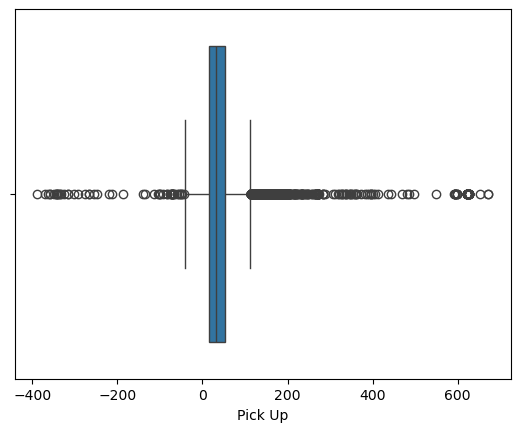

In [8]:
sns.boxplot(x=df['Pick Up'])
plt.show()

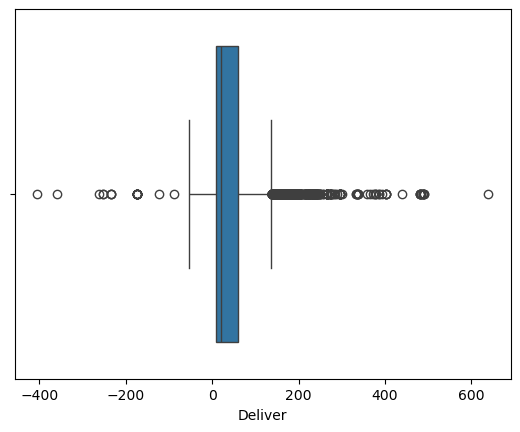

In [9]:
sns.boxplot(x=df['Deliver'])
plt.show()

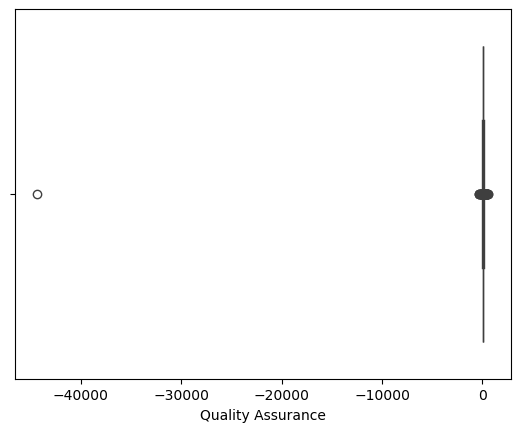

In [10]:
sns.boxplot(x=df['Quality Assurance'])
plt.show()

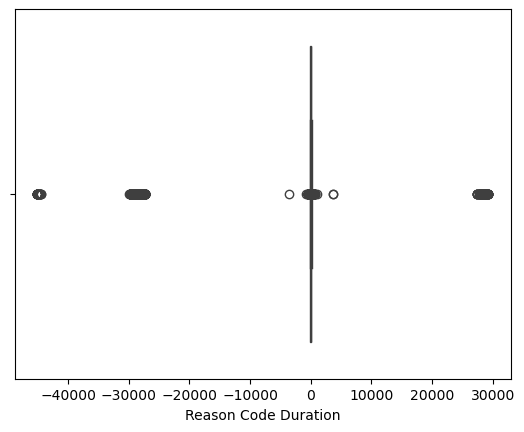

In [11]:
sns.boxplot(x=df['Reason Code Duration'])
plt.show()

In [12]:
df['Reason Code Duration'] = df['Reason Code Duration'].fillna(df['Reason Code Duration'].median())
df['Quality Assurance'] = df['Quality Assurance'].fillna(df['Quality Assurance'].median())
df['Pick Up'] = df['Pick Up'].fillna(df['Pick Up'].mean())
df['Deliver'] = df['Deliver'].fillna(df['Deliver'].mean())
df['Reason Code'] = df['Reason Code'].fillna('Unknown')

In [13]:
df.isnull().sum()

ROPOLine                      0
Task Order                    0
Condom Adjusted Task Order    0
Country                       0
RO Number                     0
                             ..
Pick Up                       0
Deliver                       0
Quality Assurance             0
Reason Code                   0
Reason Code Duration          0
Length: 104, dtype: int64

In [14]:
### FEATURE ENGINEERING

#Calculate the delivery delay
# Convert specific columns to datetime format
date_columns = [
    'Agreed Delivery Date',
    'Latest Actual Delivery Date',
    'Order Entry Date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['Delivery Delay'] = (df['Latest Actual Delivery Date'] - df['Agreed Delivery Date']).dt.days
df['On-Time Delivery'] = (df['Delivery Delay'] <= 0).astype(int)
df['Delivery Status Category'] = pd.cut(df['Delivery Delay'], bins=[-float('inf'), 0, 14, 30, float('inf')], labels=['On-Time', 'Slightly Late', 'Late', 'Very Late'])
df[['Delivery Delay', 'On-Time Delivery', 'Delivery Status Category']].head()

,Delivery Delay,On-Time Delivery,Delivery Status Category
0,-21.0,1,On-Time
1,4.0,0,Slightly Late
2,18.0,0,Late
3,3.0,0,Slightly Late
4,-34.0,1,On-Time


In [15]:
#Get vendor reliability
vendor_reliability = df.groupby('Vendor Incoterm')['Delivery Delay'].mean().reset_index()
df = pd.merge(df, vendor_reliability, on='Vendor Incoterm', how='left', suffixes=('', '_Vendor_Avg'))

#Get country reliability
country_performance = df.groupby('Country')['On-Time Delivery'].mean().reset_index()
df = pd.merge(df, country_performance, on='Country', how='left', suffixes=('', '_Country_Avg'))

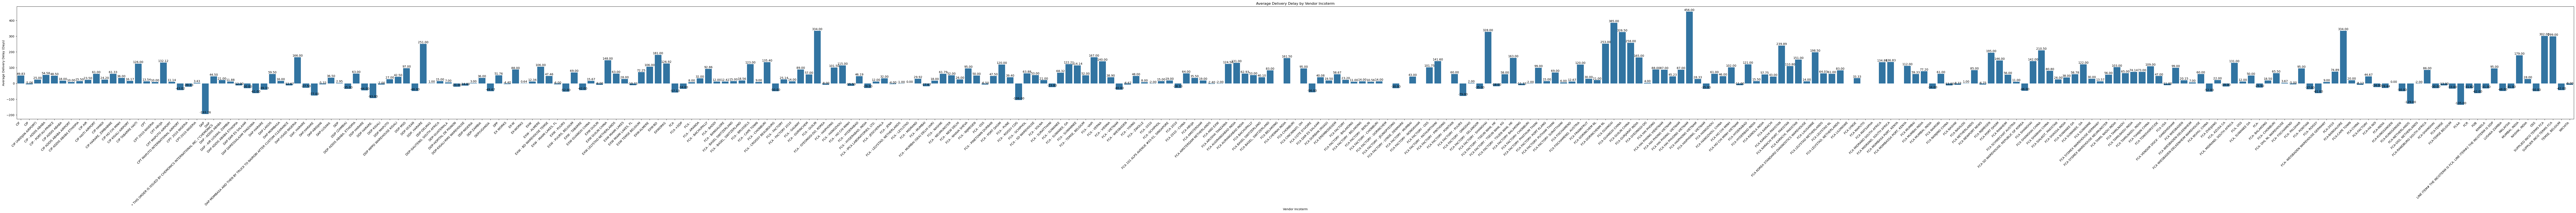

In [16]:
#Plot vendor performance
plt.figure(figsize=(120, 10))
ax = sns.barplot(data=vendor_reliability, x='Vendor Incoterm', y='Delivery Delay')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.title('Average Delivery Delay by Vendor Incoterm')
plt.xlabel('Vendor Incoterm')
plt.ylabel('Average Delivery Delay (Days)')
plt.tight_layout()
plt.show()

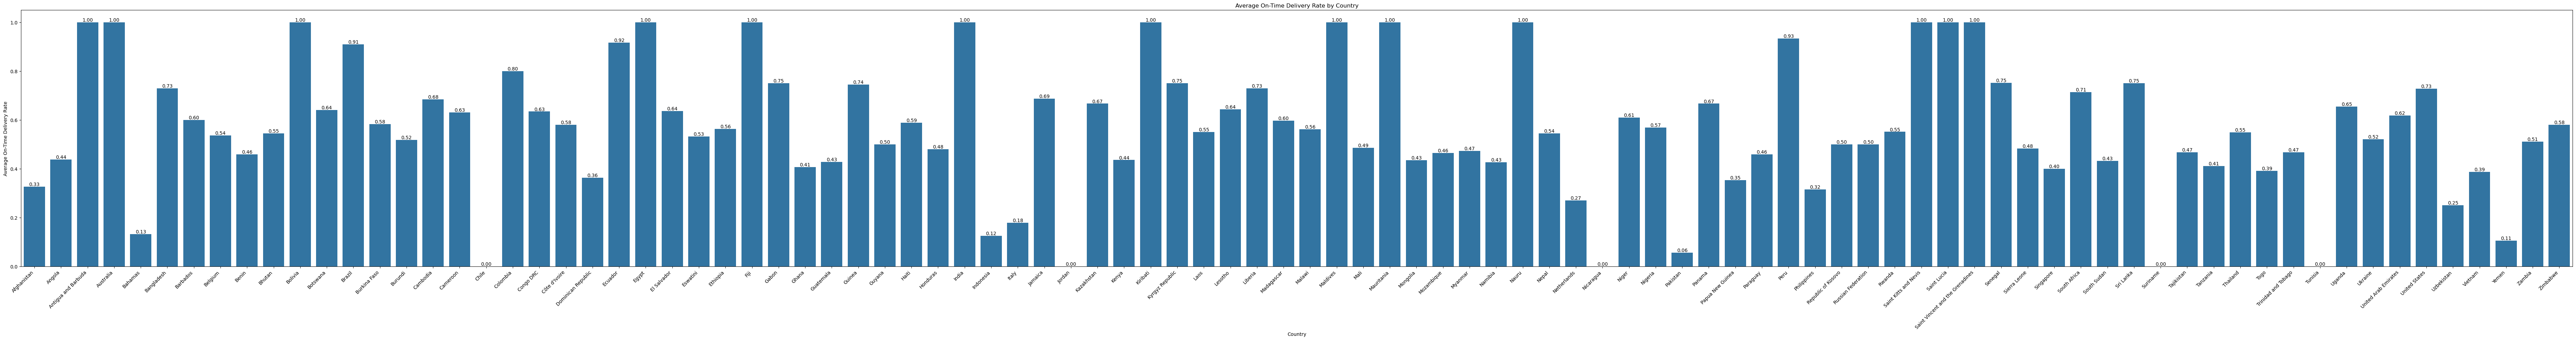

In [17]:
# Plot the country performance
plt.figure(figsize=(75,10))
ax = sns.barplot(data=country_performance, x='Country', y='On-Time Delivery')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.title('Average On-Time Delivery Rate by Country')
plt.xlabel('Country')
plt.ylabel('Average On-Time Delivery Rate')
plt.tight_layout()
plt.show()

In [18]:
df['Fulfillment_Transportation'] = df['Fulfillment Method'] + '_' + df['Transportation Mode']

df['Product_LeadTime_Ratio'] = df['Estimated Lead Time in Days'] / df.groupby('Product Category')['Estimated Lead Time in Days'].transform('mean')
df['Product_LeadTime_Ratio'] = df['Product_LeadTime_Ratio'].fillna(df['Product_LeadTime_Ratio'].mean())


df['Days Since Order Entry'] = (df['Latest Actual Delivery Date'] - df['Order Entry Date']).dt.days

target_mean = df.groupby('Country')['On-Time Delivery'].mean()
df['Country_Target_Encoded'] = df['Country'].map(target_mean)

# Displaying a sample of the DataFrame to show the new features
df[['Fulfillment_Transportation', 'Product_LeadTime_Ratio', 'Days Since Order Entry', 'Country_Target_Encoded']].head()

,Fulfillment_Transportation,Product_LeadTime_Ratio,Days Since Order Entry,Country_Target_Encoded
0,Direct Drop_Land,1.000000,90,0.463847
1,Direct Drop_Land,1.005335,500,0.510773
2,Direct Drop_Land,1.055601,303,0.510773
3,Direct Drop_Land,0.754001,193,0.510773
4,Direct Drop_Land,1.000000,106,0.463847


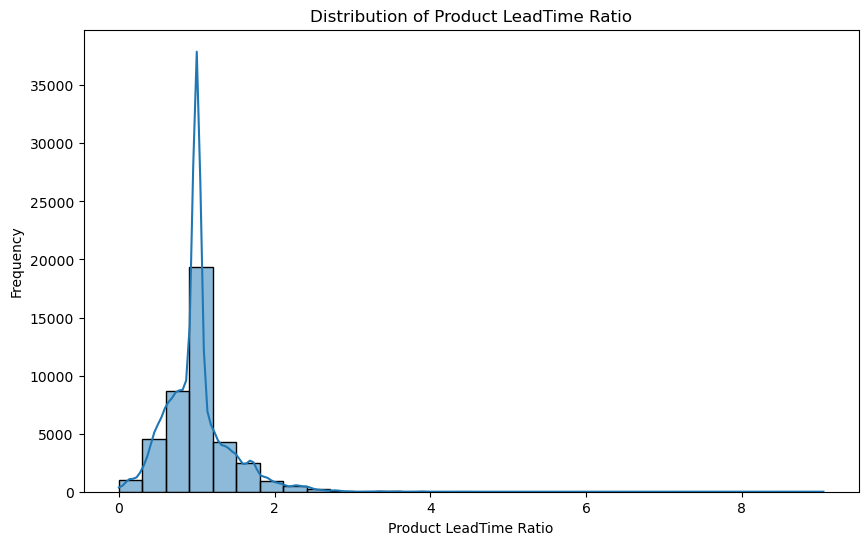

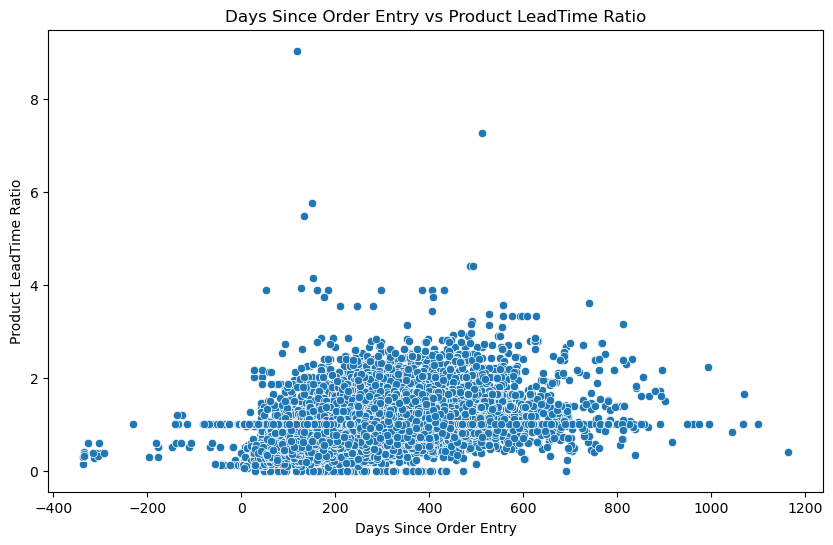

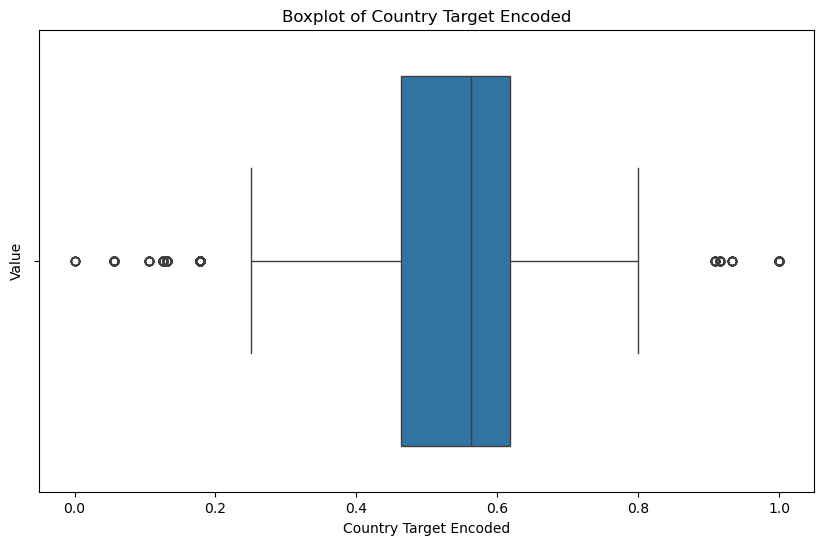

In [19]:
# Distribution of Product_LeadTime_Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Product_LeadTime_Ratio'], bins=30, kde=True)
plt.title('Distribution of Product LeadTime Ratio')
plt.xlabel('Product LeadTime Ratio')
plt.ylabel('Frequency')
plt.show()

# Relationship between Days Since Order Entry and Product LeadTime Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days Since Order Entry', y='Product_LeadTime_Ratio', data=df)
plt.title('Days Since Order Entry vs Product LeadTime Ratio')
plt.xlabel('Days Since Order Entry')
plt.ylabel('Product LeadTime Ratio')
plt.show()

# Boxplot of Country Target Encoded
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country_Target_Encoded', data=df)
plt.title('Boxplot of Country Target Encoded')
plt.xlabel('Country Target Encoded')
plt.ylabel('Value')
plt.show()

In [20]:
df['Actual vs Estimated Delivery'] = (pd.to_datetime(df['Latest Actual Delivery Date']) - pd.to_datetime(df['Estimated Delivery Date'])).dt.days
df['Order to PO Released Duration'] = (pd.to_datetime(df['PO Released For Fulfillment Date']) - pd.to_datetime(df['Order Entry Date'])).dt.days
df['Order Value'] = df['Illustrative Price'] * df['Ordered Quantity']


In [21]:
df['Order Entry Day'] = pd.to_datetime(df['Order Entry Date']).dt.day
df['Order Entry Month'] = pd.to_datetime(df['Order Entry Date']).dt.month

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation of 'Delivery Delay' if it exists
if 'Delivery Delay' in correlation_matrix.columns:
    print(correlation_matrix['Delivery Delay'].sort_values(ascending=False))
else:
    print("Column 'Delivery Delay' is not in the numeric DataFrame.")


Delivery Delay                                  1.000000
Reason Code Duration                            0.104255
Average Days Late                               0.060904
Delivery Delay_Vendor_Avg                       0.048158
Country_Target_Encoded                          0.047683
On-Time Delivery_Country_Avg                    0.047683
Manufacture                                     0.044988
Estimated Lead Time in Days                     0.032781
Actual vs Estimated Delivery                    0.027101
Deliver                                         0.016341
Product_LeadTime_Ratio                          0.016032
Base Unit Multiplier                            0.013391
Order Entry Date Fiscal Year                    0.007004
Illustrative Price                              0.006163
Order Entry Date Year                           0.004869
Latest Actual Delivery Date Fiscal Year         0.001282
Latest Actual Delivery Date Year                0.001209
Pick Up                        

In [23]:
target_corr = correlation_matrix['Delivery Delay']

# Define a threshold for low correlation
threshold = 0.03  

# Identify features to drop
features_to_drop = target_corr[(target_corr.abs() < threshold) | target_corr.isna()].index.tolist()

# Drop the identified features from the dataframe
df_refined = df.drop(columns=features_to_drop)

print(f'Features dropped: {features_to_drop}')
print(df_refined.head())

Features dropped: ['Prime Line Number', 'Base Unit Multiplier', 'Illustrative Price', 'Ordered Quantity', 'Shipped Quantity', 'Number of Shipments', 'Delivery Progress', 'Order Entry Date Year', 'Order Entry Date Fiscal Year', 'Estimated Delivery Date Year', 'Estimated Delivery Date Fiscal Year', 'Latest Actual Delivery Date Year', 'Latest Actual Delivery Date Fiscal Year', 'PO Released For Fulfillment Date Year', 'PO Released For Fulfillment Date Fiscal Year', 'Order Cycle Time', 'RO Validation', 'Sourcing and Planning', 'USAID Approval', 'Pick Up', 'Deliver', 'Quality Assurance', 'Product_LeadTime_Ratio', 'Days Since Order Entry', 'Actual vs Estimated Delivery', 'Order Value', 'Order Entry Month']
                 ROPOLine Task Order Condom Adjusted Task Order     Country  \
0   RO10021223PO100019151        TO1                        TO1  Mozambique   
1   RO10060249PO100087742        TO1                        TO1      Zambia   
2  RO10071106PO1001100012        TO1                  

In [24]:
# List of features to standardize
features_to_standardize = [
    'Reason Code Duration', 'Delivery Delay', 'Delivery Delay_Vendor_Avg', 
    'On-Time Delivery_Country_Avg', 'Country_Target_Encoded', 
    'Order to PO Released Duration'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization to the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Approach 1: Using only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix (Numeric Columns Only):")
print(correlation_matrix['Delivery Delay'].sort_values(ascending=False))

# Approach 2: Encoding categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # Drop first to avoid multicollinearity
numeric_encoded_df = df_encoded.select_dtypes(include=['float64', 'int64'])
correlation_matrix_encoded = numeric_encoded_df.corr()
print("Correlation Matrix (With Encoded Categorical Data):")
print(correlation_matrix_encoded['Delivery Delay'].sort_values(ascending=False))

Correlation Matrix (Numeric Columns Only):
Delivery Delay                                  1.000000
Reason Code Duration                            0.104255
Average Days Late                               0.060904
Delivery Delay_Vendor_Avg                       0.048158
Country_Target_Encoded                          0.047683
On-Time Delivery_Country_Avg                    0.047683
Manufacture                                     0.044988
Estimated Lead Time in Days                     0.032781
Actual vs Estimated Delivery                    0.027101
Deliver                                         0.016341
Product_LeadTime_Ratio                          0.016032
Base Unit Multiplier                            0.013391
Order Entry Date Fiscal Year                    0.007004
Illustrative Price                              0.006163
Order Entry Date Year                           0.004869
Latest Actual Delivery Date Fiscal Year         0.001282
Latest Actual Delivery Date Year             

In [25]:
print("\nColumn Names and Data Types:")
for column, dtype in df.dtypes.items():
    print(f"{column}: {dtype}")


Column Names and Data Types:
ROPOLine: object
Task Order: object
Condom Adjusted Task Order: object
Country: object
RO Number: object
PO DO IO Number: object
Order Number: object
Prime Line Number: int64
Status Name: object
TLP Indicator: object
Order Type: object
Fulfillment Method: object
Transportation Mode: object
Item Tracer Category: object
Product Category: object
Product ID: object
Product_Name: object
UOM: object
Base Unit: object
Base Unit Multiplier: float64
Framework Contract: object
D365 Health Element: object
D365 Funding Source: object
D365 Funding Source Detail: object
Fiscal_Year_Funding: object
Estimated Lead Time in Days: float64
Vendor Incoterm: object
Destination Incoterm: object
Illustrative Price: float64
Ordered Quantity: int64
Shipped Quantity: int64
OTD OTIF Exclusion Flag: object
In Full (IFD): object
On Time (OTD): object
Between -14 and 14: object
Between -30 and 30: object
OTIF Categories: object
OTIF Between -14 and 14: object
OTIF Between -30 and 30: ob

In [26]:
# Generate correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Display correlation with the target variable
print(correlation_matrix['Delivery Delay'].sort_values(ascending=False))


Delivery Delay                                  1.000000
Reason Code Duration                            0.104255
Average Days Late                               0.060904
Delivery Delay_Vendor_Avg                       0.048158
Country_Target_Encoded                          0.047683
On-Time Delivery_Country_Avg                    0.047683
Manufacture                                     0.044988
Estimated Lead Time in Days                     0.032781
Actual vs Estimated Delivery                    0.027101
Deliver                                         0.016341
Product_LeadTime_Ratio                          0.016032
Base Unit Multiplier                            0.013391
Order Entry Date Fiscal Year                    0.007004
Illustrative Price                              0.006163
Order Entry Date Year                           0.004869
Latest Actual Delivery Date Fiscal Year         0.001282
Latest Actual Delivery Date Year                0.001209
Pick Up                        

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns to numeric values
categorical_cols = df.select_dtypes(include=['object', 'category'])
encoded_df = categorical_cols.apply(LabelEncoder().fit_transform)

# Concatenate encoded categorical columns with numeric columns
combined_df = pd.concat([numeric_cols, encoded_df], axis=1)

# Generate correlation matrix for the combined DataFrame
correlation_matrix_combined = combined_df.corr()

# Display correlation with the target variable
print(correlation_matrix_combined['Delivery Delay'].sort_values(ascending=False))


Delivery Delay                         1.000000
Reason Code Duration                   0.104255
Delivery Status Category               0.062331
Average Days Late                      0.060904
Delivery Delay_Vendor_Avg              0.048158
                                         ...   
Requested Delivery Date Fiscal Year   -0.126831
Requested Delivery Date Year          -0.128548
Agreed Delivery Date Fiscal Year      -0.851796
Agreed Delivery Date Year             -0.852141
Delivery Progress                           NaN
Name: Delivery Delay, Length: 112, dtype: float64


In [28]:
for column, dtype in df.dtypes.items():
    print(f"Column: {column}, Type: {dtype}")

Column: ROPOLine, Type: object
Column: Task Order, Type: object
Column: Condom Adjusted Task Order, Type: object
Column: Country, Type: object
Column: RO Number, Type: object
Column: PO DO IO Number, Type: object
Column: Order Number, Type: object
Column: Prime Line Number, Type: int64
Column: Status Name, Type: object
Column: TLP Indicator, Type: object
Column: Order Type, Type: object
Column: Fulfillment Method, Type: object
Column: Transportation Mode, Type: object
Column: Item Tracer Category, Type: object
Column: Product Category, Type: object
Column: Product ID, Type: object
Column: Product_Name, Type: object
Column: UOM, Type: object
Column: Base Unit, Type: object
Column: Base Unit Multiplier, Type: float64
Column: Framework Contract, Type: object
Column: D365 Health Element, Type: object
Column: D365 Funding Source, Type: object
Column: D365 Funding Source Detail, Type: object
Column: Fiscal_Year_Funding, Type: object
Column: Estimated Lead Time in Days, Type: float64
Column: 

In [29]:
# Convert 'Estimated Delivery Date' to datetime
df['Estimated Delivery Date'] = pd.to_datetime(df['Estimated Delivery Date'], errors='coerce')

# Calculate 'Estimated Delivery Date' as the number of days since a reference date
reference_date = pd.to_datetime('2000-01-01')
df['Estimated Delivery Date Numeric'] = (df['Estimated Delivery Date'] - reference_date).dt.days

# Drop rows with NaN values in the new numeric column
df = df.dropna(subset=['Estimated Delivery Date Numeric'])

# List of categorical features to encode
categorical_features = ['Fulfillment Method', 'Transportation Mode', 'Product Category', 'Vendor Incoterm', 'Country']

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Add the numeric representation of 'Estimated Delivery Date' to the encoded DataFrame
df_encoded['Estimated Delivery Date Numeric'] = df['Estimated Delivery Date Numeric']

# Select only numerical columns for correlation matrix
numerical_df = df_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the top 10 values correlated with 'Estimated Delivery Date Numeric'
top_10_correlations = correlation_matrix['Estimated Delivery Date Numeric'].sort_values(ascending=False).head(21)  # head(11) to include 'Estimated Delivery Date Numeric' itself

print(top_10_correlations)


Estimated Delivery Date Numeric                 1.000000
Estimated Delivery Date Fiscal Year             0.997047
Estimated Delivery Date Year                    0.997015
Latest Actual Delivery Date Year                0.575210
Latest Actual Delivery Date Fiscal Year         0.572334
PO Released For Fulfillment Date Year           0.569028
PO Released For Fulfillment Date Fiscal Year    0.568303
Order Entry Date Fiscal Year                    0.564654
Order Entry Date Year                           0.563332
Requested Delivery Date Fiscal Year             0.491567
Requested Delivery Date Year                    0.488024
Agreed Delivery Date Year                       0.314632
Agreed Delivery Date Fiscal Year                0.313979
Revised Agreed Delivery Date Fiscal Year        0.259948
Revised Agreed Delivery Date Year               0.259367
Days Since Order Entry                          0.114075
Order Cycle Time                                0.114075
Product_LeadTime_Ratio         

In [35]:
columns = df.columns.tolist()

# Get the column names
for i, col in enumerate(columns, start=1):
    print(f": {col}, Type: {dtype}")

: ROPOLine, Type: int32
: Task Order, Type: int32
: Condom Adjusted Task Order, Type: int32
: Country, Type: int32
: RO Number, Type: int32
: PO DO IO Number, Type: int32
: Order Number, Type: int32
: Prime Line Number, Type: int32
: Status Name, Type: int32
: TLP Indicator, Type: int32
: Order Type, Type: int32
: Fulfillment Method, Type: int32
: Transportation Mode, Type: int32
: Item Tracer Category, Type: int32
: Product Category, Type: int32
: Product ID, Type: int32
: Product_Name, Type: int32
: UOM, Type: int32
: Base Unit, Type: int32
: Base Unit Multiplier, Type: int32
: Framework Contract, Type: int32
: D365 Health Element, Type: int32
: D365 Funding Source, Type: int32
: D365 Funding Source Detail, Type: int32
: Fiscal_Year_Funding, Type: int32
: Estimated Lead Time in Days, Type: int32
: Vendor Incoterm, Type: int32
: Destination Incoterm, Type: int32
: Illustrative Price, Type: int32
: Ordered Quantity, Type: int32
: Shipped Quantity, Type: int32
: OTD OTIF Exclusion Flag,

In [30]:
df.to_csv('clean_usaid_data.csv', index=False)